# Some EDA into the question of how life expectancy relates to GDP

We consider 6 different countries within a period of about 15 years and having different geolocations, industralisation and economic development. This will strengthen the conidence in any observed common trends

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

In [3]:
gdp = pd.read_csv('all_data.csv')
gdp.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
gdp.info() # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [6]:
gdp.Country.value_counts()

China                       16
Germany                     16
United States of America    16
Chile                       16
Zimbabwe                    16
Mexico                      16
Name: Country, dtype: int64

In [40]:
sns.set(font_scale=1.4)

In [41]:
# rename columns for better accessibility
gdp.columns = ['country', 'year', 'life_exp', 'GDP']

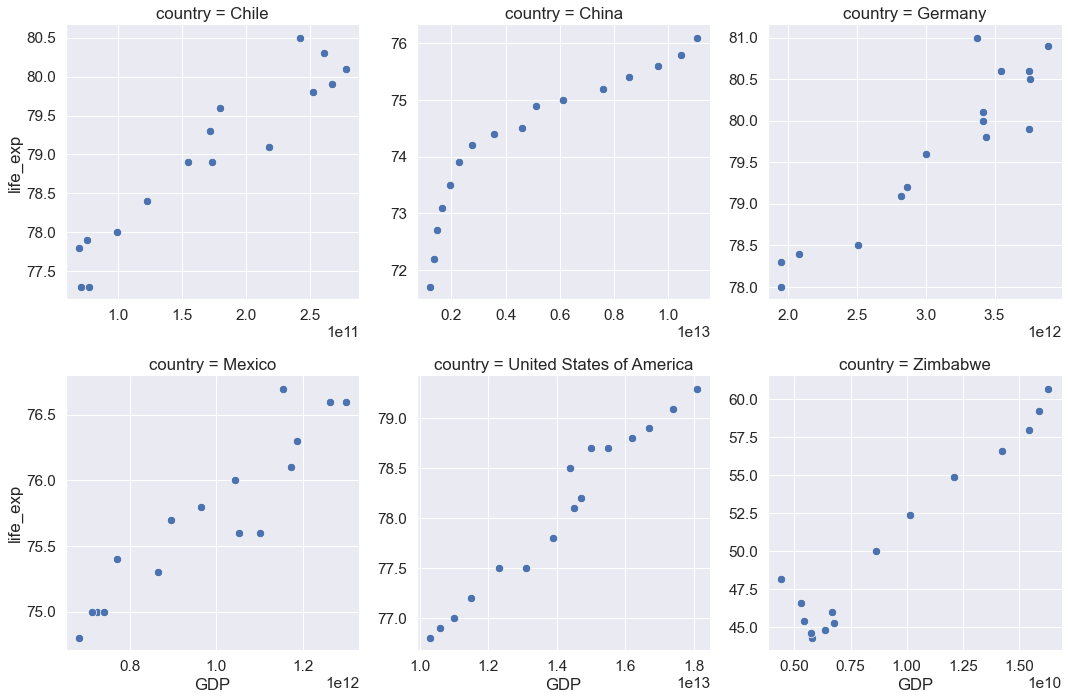

In [90]:
sns.relplot(data=gdp, x='GDP', y='life_exp',
           col='country', col_wrap=3, s=70,
            facet_kws={'sharex':False, 'sharey': False})
plt.show()

We compare GDP-life_exp relation for each country to see the difference in scale.

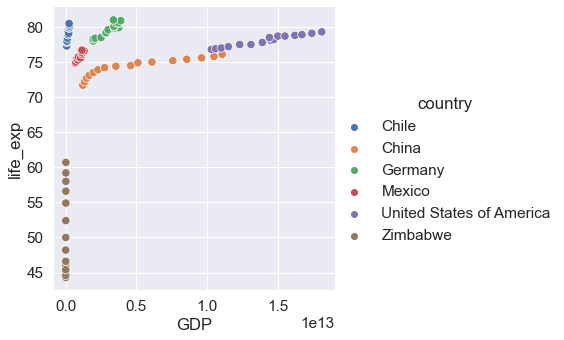

In [43]:
sns.relplot(data=gdp, x='GDP', y='life_exp',
           hue='country', s=70)
plt.show()

we notice a tendency of life expectancy to grow slower for higher values of GDP. This makes sense as we can assume a threshold of life-quality that ensures a high quality of life, after which increase in generalised wealth does not add significantly to years of life.

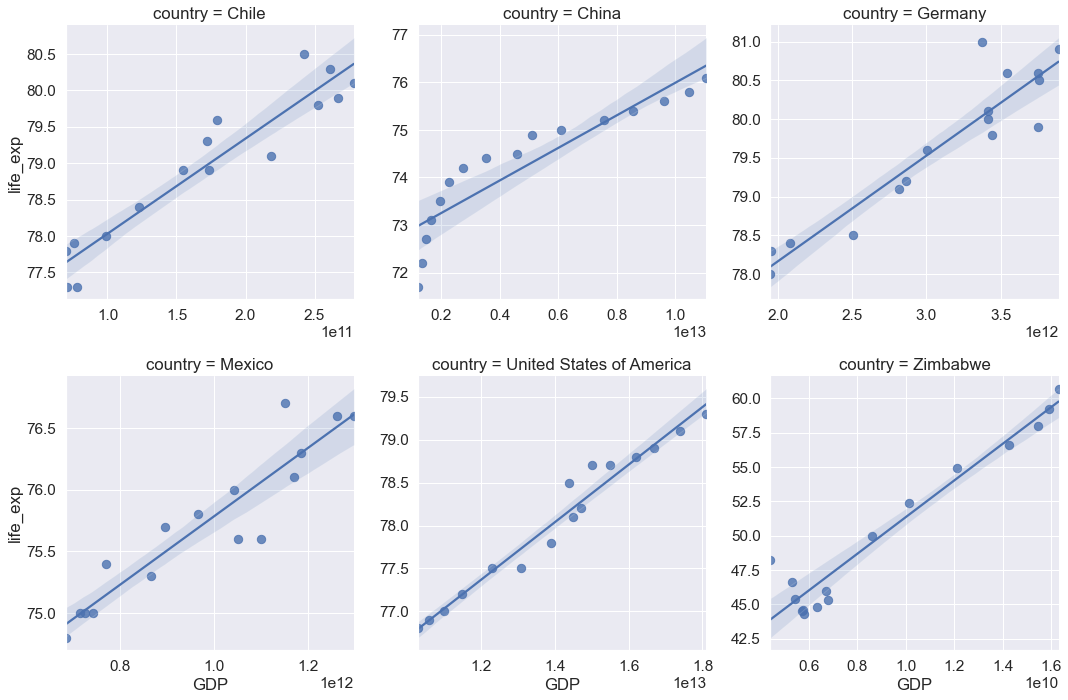

In [97]:
sns.lmplot(data=gdp, x='GDP', y='life_exp',
           col='country', col_wrap=3, sharex=False,
          sharey=False, scatter_kws={'s': 70})
plt.show()

In [44]:
chile = gdp.loc[gdp.country == 'Chile']
germany = gdp.loc[gdp.country == 'Germany']
mexico = gdp.loc[gdp.country == 'Mexico']
zimbabwe = gdp.loc[gdp.country == 'Zimbabwe']
USA = gdp.loc[gdp.country == 'United States of America']
china = gdp.loc[gdp.country == 'China']

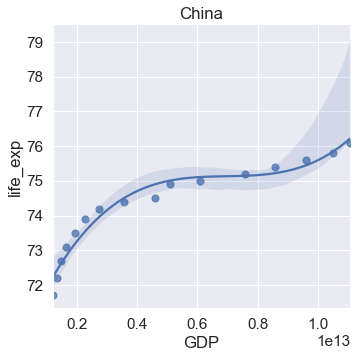

In [98]:
sns.lmplot(data=china, x='GDP', y='life_exp',
          scatter_kws={'s': 50}, ci=95, order=3)
plt.title('China')
plt.show()

China shows a cubic relationship after a closer look

Different countries show linear relationships between GDP and life expectancy. At one extreme of the spectrum there is Zimbabwe on on side, whose large variation of life expectancy corresponds a small variation in GDP.
On the other side olf the spectrum are the US and China where large variations of GDP correspond to small variation in life expectancy.

It is interesting at this point to go deeper into the observation that the richer countries are indeed the ones that show a slower increase of life exctancy as a function of GDP

In [99]:
countries = gdp.groupby(['country'])[['GDP', 'life_exp']].mean().reset_index()

In [100]:
countries

,country,GDP,life_exp
0,Chile,1.697888e+11,78.94375
1,China,4.957714e+12,74.26250
2,Germany,3.094776e+12,79.65625
3,Mexico,9.766506e+11,75.71875
4,United States of America,1.407500e+13,78.06250
5,Zimbabwe,9.062580e+09,50.09375


In [110]:
countries.country.replace(to_replace=['United States of America'],
                 value='USA', inplace=True)
countries.country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'],
      dtype=object)

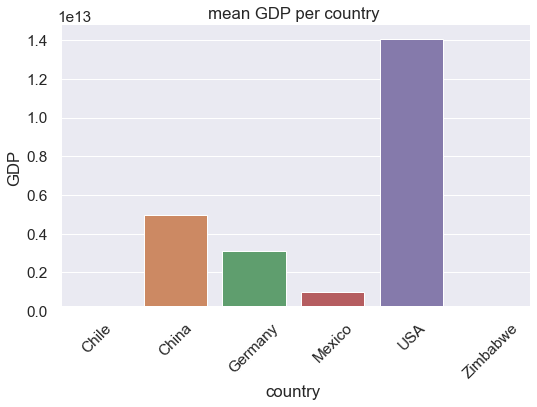

In [139]:
sns.catplot(kind='bar', x='country', y='GDP', data=countries,
           aspect=1.5, estimator=np.mean)
plt.xticks(rotation=45)
plt.title('mean GDP per country')
plt.show()

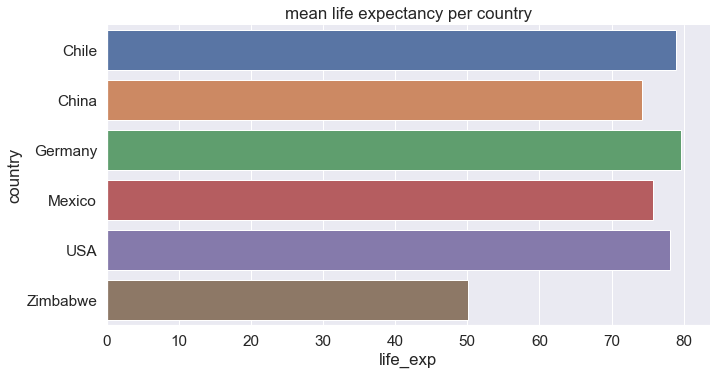

In [115]:
sns.catplot(data=countries, y='country', x='life_exp',
           aspect=2, kind='bar')
plt.title('mean life expectancy per country')
plt.show()

China and the US are indeed the richest countries. Notice how mean life expectancy of poorer countries like Chile though compares to and even surpasses the life expectancy of richer countries.<br><br>

The interesting finding is that no matter how high the fife expectancy, an increase in GDP for a poorer country results in a steeper variation in life expectancy. This might be due to increased overall access to quality healthcare and medicines, better nutrition and aetter lifestyle quality.

In order to confirm this hypothesis though, we must show that the average life expectancy for poorer countries is not biased by a single steep increase that outweights the life expectancy across most years. We can veryfy this by inspecting the scatterplots above, but to aid visualisation we shall see how life expectancy increase compare for different countries

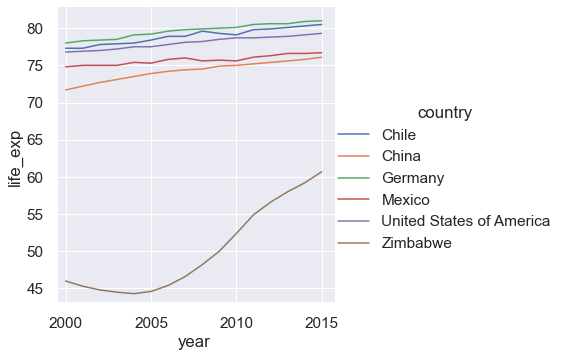

In [128]:
g = sns.relplot(kind='line', data=gdp, x='year',
           y='life_exp', hue='country')

plt.show()

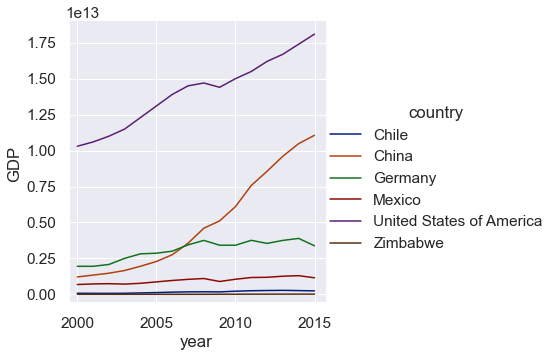

In [143]:
g = sns.relplot(kind='line', data=gdp, x='year',
           y='GDP', hue='country', palette='dark')

plt.show()

We notice a steep increase of GDP for China. After about 2008, it became higher that Germany. We have already observed a higher GDP for china corresponds to a splower increase in life expectancy. This is further evidence towards our hypothesis.